In [2]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
fn = get_pkg_data_filename('data/j94f05bgq_flt.fits', package='astropy.wcs.tests')
f = fits.open(fn)
w = WCS(f[1].header)
sky = w.pixel_to_world(30, 40)
print(sky)  

f.close()

<SkyCoord (ICRS): (ra, dec) in deg
    (5.52844243, -72.05207809)>


In [3]:
import numpy as np

In [4]:
w.world_to_pixel(sky)

(array(30.00000215), array(39.99999996))

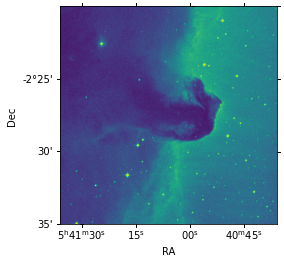

In [5]:
import warnings
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS, FITSFixedWarning
from astropy.utils.data import get_pkg_data_filename

filename = get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits')

hdu = fits.open(filename)[0]
with warnings.catch_warnings():
    # Ignore a warning on using DATE-OBS in place of MJD-OBS
    warnings.filterwarnings('ignore', message="'datfix' made the change",
                            category=FITSFixedWarning)
    wcs = WCS(hdu.header)

fig = plt.figure()
fig.add_subplot(111, projection=wcs)
plt.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
plt.xlabel('RA')
plt.ylabel('Dec')

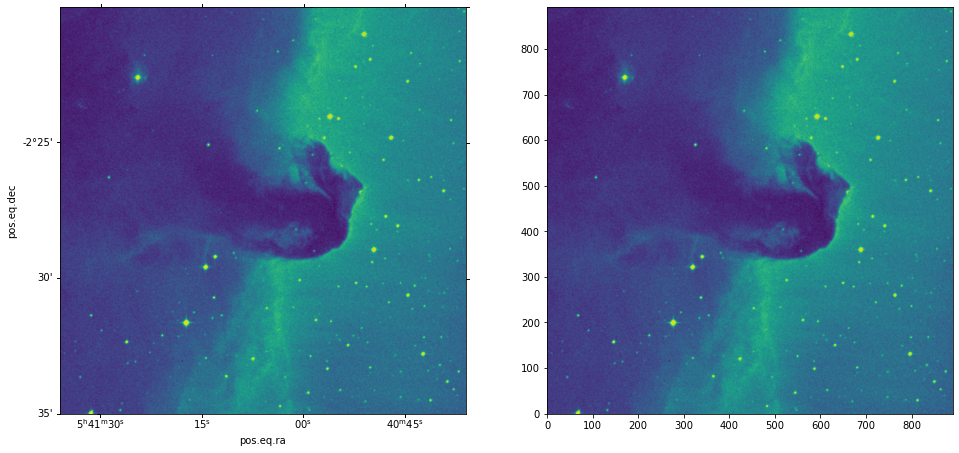

In [6]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax = fig.add_subplot(122)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)

In [7]:
sky = wcs.pixel_to_world(800,300)
print(sky)

<SkyCoord (ICRS): (ra, dec) in deg
    (85.17535729, -2.49902863)>


In [8]:
sky.ra.hms

hms_tuple(h=5.0, m=40.0, s=42.08574888598321)

In [9]:
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 85.59941666666666  -4.946638888888889  
CRPIX : -716.333144294269  -8444.64946698226  
PC1_1 PC1_2  : 0.015029018460682027  -9.63735777657198e-06  
PC2_1 PC2_2  : 1.0548917307845708e-05  0.015000473845055023  
CDELT : -0.018654788242111486  0.018654788242111486  
NAXIS : 891  893

In [10]:
hdu.data.shape

(893, 891)

In [11]:
from astropy.coordinates import SkyCoord

In [12]:
SkyCoord('5h41m30s -2d30m00s')


<SkyCoord (ICRS): (ra, dec) in deg
    (85.375, -2.5)>

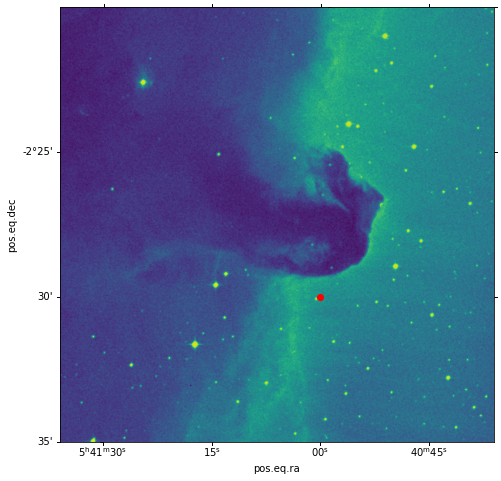

In [13]:
coord = SkyCoord('5h41m00s -2d30m00s')
pix_x, pix_y = wcs.world_to_pixel(coord)
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax.scatter(pix_x, pix_y,  color='red')

In [14]:
sky.dec.dms

dms_tuple(d=-2.0, m=-29.0, s=-56.50307640836111)

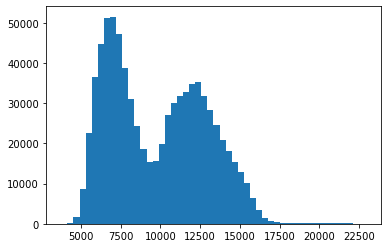

In [15]:
fix, ax = plt.subplots()
zz=ax.hist(hdu.data.flatten(), bins=50)

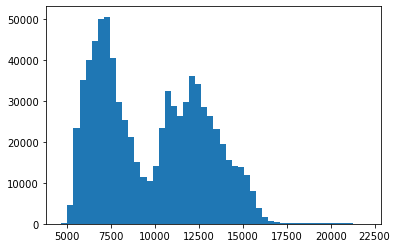

In [16]:
from scipy.ndimage import convolve
fix, ax = plt.subplots()
convd = convolve(hdu.data, np.ones((5,5))/25.0)
zz=ax.hist(convd.flatten(), bins=50)

In [17]:
(hdu.data>17500).sum()

2276

In [18]:
from scipy.ndimage import find_objects, label, generate_binary_structure, maximum_filter

In [19]:
#convd = convolve(hdu.data, np.ones((5,5))/25.0)
#img_masked = hdu.data > 22000
convd = maximum_filter(hdu.data, size=(5,5))
img_masked = convd > 20000
s = generate_binary_structure(2,2)
labeled_array, nfeatures = label(img_masked, structure=s)
print(f'Features found: {nfeatures}')

Features found: 75


In [20]:
locs = find_objects(labeled_array)
labeled_array[locs[10]]

array([[ 0,  0, 11, 11, 11, 11, 11,  0],
       [11, 11, 11, 11, 11, 11, 11, 11],
       [11, 11, 11, 11, 11, 11, 11, 11],
       [11, 11, 11, 11, 11, 11, 11, 11],
       [11, 11, 11, 11, 11, 11, 11, 11],
       [11, 11, 11, 11, 11, 11, 11, 11],
       [11, 11, 11, 11, 11, 11, 11, 11],
       [ 0, 11, 11, 11, 11, 11, 11, 11],
       [ 0,  0, 11, 11, 11, 11, 11,  0]])

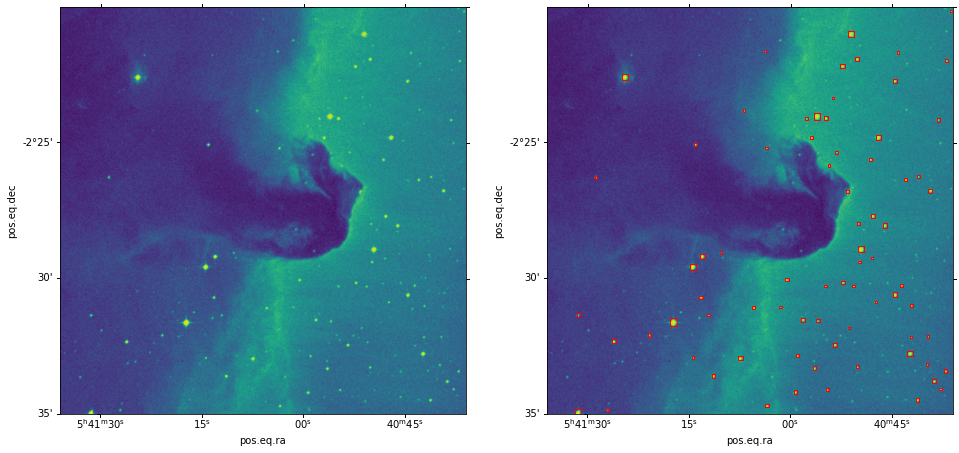

In [21]:
from  matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection


rects = []
for idx in range(nfeatures):
    loc = locs[idx]
    xy = (loc[1].start, loc[0].start)
    width = loc[1].stop - loc[1].start
    height = loc[0].stop - loc[0].start
    rect = Rectangle(xy, width, height, color='red')
    rects.append(rect)

pc = PatchCollection(rects, facecolor='none', edgecolor='red')

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax = fig.add_subplot(122, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax.add_collection(pc)

In [22]:
# get the coords of the middle of the image
ps = wcs.pixel_shape
mid = (ps[0]//2, ps[1]//2)
coord = wcs.pixel_to_world(mid[0], mid[1])
print(f'RA: {coord.ra.hms}, Dec: {coord.dec.dms}')

RA: hms_tuple(h=5.0, m=41.0, s=5.998564085631983), Dec: dms_tuple(d=-2.0, m=-27.0, s=-29.86718700600605)


In [23]:
import sys
sys.path.append('./src')
from src.gaiastars import gaiastars as gs
import astropy.units as u
horsehead = gs(name = 'Gaia Horsehead stars', description ='Horse Head Nebula Vicinity')
horsehead.conesearch(coord.ra, coord.dec, radius=7.5*u.arcminute)

INFO: Query finished. [astroquery.utils.tap.core]


In [24]:
len(horsehead)

66

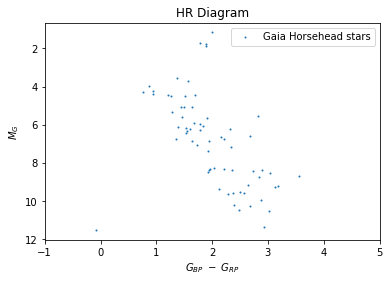

In [25]:
horsehead.plot_hrdiagram()

In [26]:
coords = horsehead.get_coords()
pxs = wcs.world_to_pixel(coords)

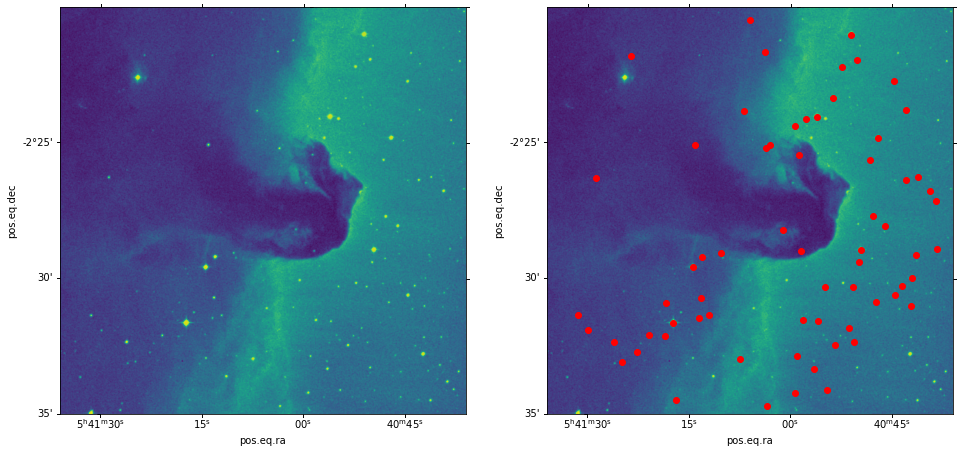

In [27]:
#85.24583,-2.45833,0.008333333333333333


fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax = fig.add_subplot(122, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax.scatter(pxs[0], pxs[1], color='red')

In [48]:
img = np.zeros_like(hdu.data)
nobs = len(horsehead)
for i in range(nobs):
    x = int(pxs[0][i])
    xslice = slice(x-4, x+4, None)
    y = int(pxs[1][i])
    yslice = slice(y-4, y+4, None)
    img[yslice, xslice] = horsehead.objs.iloc[i].phot_g_mean_mag

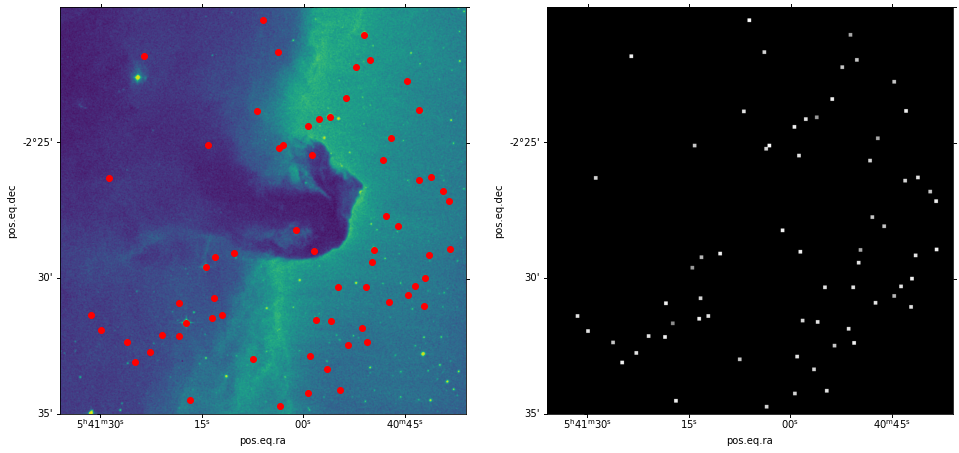

In [49]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax.scatter(pxs[0], pxs[1], color='red')
ax = fig.add_subplot(122, projection=wcs)
ax.imshow(img, origin='lower', cmap=plt.cm.binary_r)
#ax.scatter(pxs[0], pxs[1], color='red')

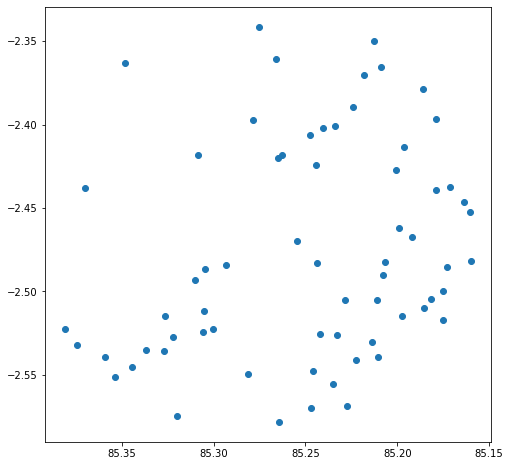

In [45]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(coords.ra, coords.dec)
ax.invert_xaxis()

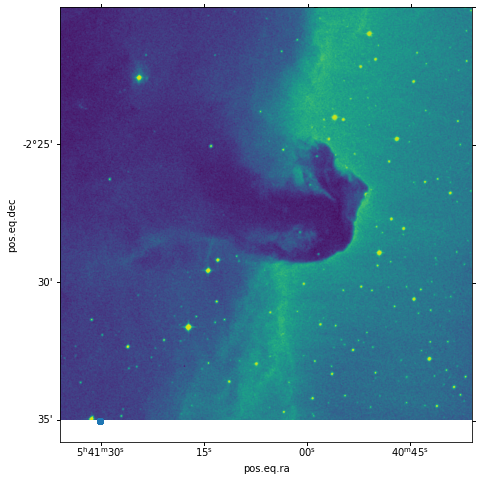

In [47]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax.scatter(coords.ra, coords.dec)

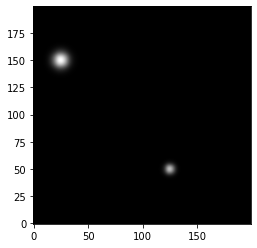

In [77]:
from scipy.stats import multivariate_normal

x_mean = -7.5
y_mean = 5

x, y = np.mgrid[-10:10:0.1, -10:10:0.1]
pos = np.dstack((x, y))
img = np.zeros_like(x)
#rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
rv = multivariate_normal([x_mean, y_mean], 0.25*np.eye(2))
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
#ax2.contourf(x, y, rv.pdf(pos))
img += rv.pdf(pos)
rv = multivariate_normal([2.5, -5.0], 0.1*np.eye(2))
img += 0.3*rv.pdf(pos)
#ax2.pcolormesh(x,y,img, shading="auto")
ax2.imshow(img.T, origin='lower', cmap='binary_r')

In [62]:
rv.pdf(pos).shape

(2000, 2000)

In [63]:
x.shape

(2000, 2000)